# Handwritten digit recognition using a convolutonal neural network and MNIST dataset
The MNIST handwritten digits datasets is one of the most popular datasets in the machine learning community. I completed a smaller scale version of this project for my machine learning class with a smaller dataset and I wanted to redo it with the full MNIST dataset. 

# Organizing the data
- Load data from MNIST
- Split data into train, validation, test sets
- 20% of trianing data we will use for validation so 48k for training and 12k for validation

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=1)

# The size of the data
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape, test_data.shape, test_labels.shape

((48000, 28, 28),
 (48000,),
 (12000, 28, 28),
 (12000,),
 (10000, 28, 28),
 (10000,))

# View the first few digits with their labels

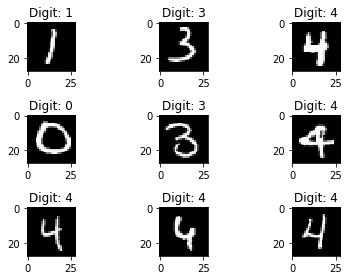

In [7]:

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
    plt.title("Digit: {}".format(train_labels[i]))
    
plt.show()
plt.close()

# Prepare Pixel Data
- Here we want to convert the data type to floats
- Also want to normalize the pixel values to the range [0,1]. Since they are greyscale images we just divide the values by 255


In [8]:
num_categories = 10

train_data = train_data.astype("float32")
train_data /= 255.0
validation_data = validation_data.astype('float32')
validation_data /= 255.0
train_labels = keras.utils.to_categorical(train_labels,num_categories)
validation_labels = keras.utils.to_categorical(validation_labels,num_categories)


# Build and train the model
- Convolution neural network with two convolution layers, a pooling layer, and two dense layers
- Training the model with 6 epochs and a batch size of 32

In [9]:


# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_categories, activation = "softmax"))

# Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
batch_size = 32
num_epoch = 6
model_log = model.fit(train_data.reshape(train_data.shape[0],28,28,1), train_labels,
          validation_data=(validation_data.reshape(validation_data.shape[0],28,28,1), validation_labels),
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          )


Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 284s 6ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 2/6
48000/48000 [==============================] - 285s 6ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 3/6
48000/48000 [==============================] - 287s 6ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 4/6
48000/48000 [==============================] - 287s 6ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0538 - val_accuracy: 0.9857
Epoch 5/6
48000/48000 [==============================] - 287s 6ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0515 - val_accuracy: 0.9883
Epoch 6/6
48000/48000 [==============================] - 305s 6ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0612 - val_accuracy: 0.9878


# Displaying results of the training process
- The first graph displays model accuracy at each epoch during training.
- The second graph displays the error of the model at each epoch.
- By observing the plots we can see that the model accuracy for the training set and validation set start to diverge pretty quickly which tells us we can probably stop training at an earlier epoch. Ideally we could use a much higher epoch number just to be sure of the results. However, the model is already at nearly 99% accuracy which is enough for our purposes. 

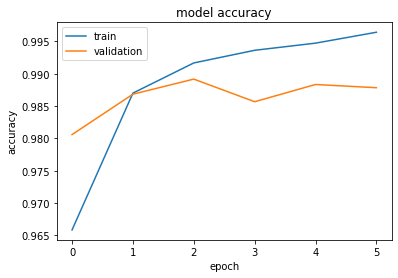

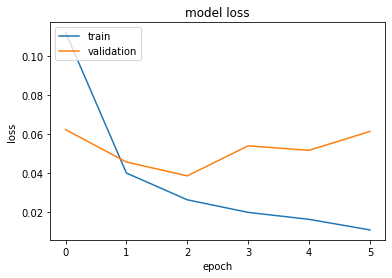

In [11]:
# summarize history for accuracy
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()